Loading article titles from italian newspapers to measure bias

In [11]:
import pandas as pd

articles = pd.read_csv('all_articles.csv')

print(articles.shape)   

# dedup by title without case sensitivity and without punctuation, newlines, etc.
articles["lower_title"] = articles["titolo"].str.lower()
articles["lower_title"] = articles["lower_title"].str.replace('[^\w\s]','', regex=True)
articles["lower_title"] = articles["lower_title"].str.replace(',','')
articles["lower_title"] = articles["lower_title"].str.replace('\n','')


# remove multiple spaces
articles["lower_title"] = articles["lower_title"].str.replace(' +', ' ', regex=True)
# remove all spaces
articles["lower_title"] = articles["lower_title"].str.replace(' ', '', regex=True)

articles = articles.drop_duplicates(subset='lower_title')

(5711, 4)


In [2]:
# n articles
print(len(articles))

4683


In [3]:
# make pandas print the whole content of the columns
pd.set_option('display.max_colwidth', None)

In [4]:
articles['date'] = pd.to_datetime(articles['data'])

## Massacres

In [5]:
import re
# articles that contain "massacro"
sinonimi_massacro = [
    "strage",
    "carnage",
    "eccidio",
    "mattanza",
    "sterminio",
]

pattern = '|'.join(sinonimi_massacro)
articles_massacro = articles[articles['titolo'].str.contains(pattern, case=False, regex=True)]


In [6]:
articles_massacro.head()

,titolo,link,data,giornale,lower_title,date
90,"Strage in ospedale a Gaza, i video con cui Israele accusa Hamas di aver lanciato il razzo",https://video.repubblica.it/dossier/video-israele-palestina-attacco-hamas-2023/strage-in-ospedale-a-gaza-i-video-con-cui-israele-accusa-hamas-di-aver-sparato-il-razzo/454930/455895?ref=search,2023-10-18,Repubblica,strageinospedaleagazaivideoconcuiisraeleaccusahamasdiaverlanciatoilrazzo,2023-10-18
191,Israele chiede chiarimenti ai media internazionali sui fotografi freelance presenti durante la strage del 7 ottobre,https://www.repubblica.it/esteri/2023/11/09/news/israele_fotografi_hamas_7_ottobre-419942337/?ref=search,2023-11-10,Repubblica,israelechiedechiarimentiaimediainternazionalisuifotografifreelancepresentidurantelastragedel7ottobre,2023-11-10
420,"Israele, durante la strage del rave sparavano anche ai ragazzi chiusi nei bagni chimici: le immagini",https://video.repubblica.it/dossier/video-israele-palestina-attacco-hamas-2023/israele-durante-la-strage-del-rave-sparavano-anche-ai-ragazzi-chiusi-nei-bagni-chimici-le-immagini/454601/455566?ref=search,2023-10-13,Repubblica,israeledurantelastragedelravesparavanoancheairagazzichiusineibagnichimicileimmagini,2023-10-13
471,"Israele: ""Attacchi su 100 siti, morto miliziano di Hamas che ha partecipato alla strage del 7 ottobre""",https://video.repubblica.it/dossier/video-israele-palestina-attacco-hamas-2023/israele-mostra-gli-obiettivi-colpiti-a-gaza-nella-notte-attacchi-su-100-siti-ucciso-terrorista-del-7-ottobre/455070/456035?ref=search,2023-10-20,Repubblica,israeleattacchisu100sitimortomilizianodihamaschehapartecipatoallastragedel7ottobre,2023-10-20
525,"Strage al rave in Israele, emergono nuovi video: così Hamas ha freddato due giovani inermi",https://video.repubblica.it/dossier/video-israele-palestina-attacco-hamas-2023/strage-al-rave-in-israele-emergono-nuovi-video-cosi-hamas-ha-freddato-due-giovani-inermi/456016/456982?ref=search,2023-11-01,Repubblica,stragealraveinisraeleemergononuovivideocosìhamashafreddatoduegiovaniinermi,2023-11-01


## Vittime

In [7]:
vittime_words=[
    "vittime",
    "vittima"
]

vittime_articles=articles[articles['titolo'].str.contains('|'.join(vittime_words), case=False, regex=True)]

In [8]:
vittime_articles.head()

,titolo,link,data,giornale,lower_title,date
159,I beduini di Israele vittime di Hamas. Ecco chi sono gli abitanti del deserto,https://www.repubblica.it/esteri/2023/10/31/news/beduini_israele_vittime_hamas_ecco_chi_sono_abitanti_deserto-419242169/?ref=search,2023-10-31,Repubblica,ibeduinidiisraelevittimedihamaseccochisonogliabitantideldeserto,2023-10-31
240,"Gaza, Israele lancia l’invasione a Sud I primi tank alle porte di Khan Yunis per cercare i capi di Hamas: centinaia le vittime",https://www.repubblica.it/esteri/2023/12/03/news/gaza_guerra_israele_raid_sud_vittime-421564101/?ref=search,2023-12-03,Repubblica,gazaisraelelancialinvasioneasudiprimitankalleportedikhanyunispercercareicapidihamascentinaialevittime,2023-12-03
441,"Israele, Papa Francesco telefona al giornalista: ""Ci sono miei amici tra le vittime di Hamas""",https://video.repubblica.it/dossier/video-israele-palestina-attacco-hamas-2023/israele-papa-francesco-telefona-al-giornalista-ci-sono-miei-amici-tra-le-vittime-di-hamas/454730/455695?ref=search,2023-10-15,Repubblica,israelepapafrancescotelefonaalgiornalistacisonomieiamicitralevittimedihamas,2023-10-15
551,Equipaggio e passeggeri di un aereo El Al cantano l'inno nazionale di Israele in ricordo delle vittime del 7 ottobre,https://video.repubblica.it/dossier/video-israele-palestina-attacco-hamas-2023/7-ottobre-equipaggio-e-passeggeri-di-un-aereo-el-al-cantano-l-inno-nazionale-di-israele-per-commemorare-le-vittime/456423/457389?ref=search,2023-11-07,Repubblica,equipaggioepasseggeridiunaereoelalcantanolinnonazionalediisraeleinricordodellevittimedel7ottobre,2023-11-07
743,"Metropolis/506 - Israele-Hamas, Di Feo: ""Vittime, militari in campo e obiettivi, tutti i numeri del conflitto""",https://video.repubblica.it/metropolis/metropolis507-israle-hamas-di-feo-vittime-militari-in-campo-e-obiettivi-tutti-i-numeri-del-conflitto/463380/464341?ref=search,2024-02-21,Repubblica,metropolis506israelehamasdifeovittimemilitariincampoeobiettivituttiinumeridelconflitto,2024-02-21


## Bambini

In [9]:
# articles that contain bambin o donn

bambini_words=[
    "bambin",
    "donn"
]

bambini_articles=articles[articles['titolo'].str.contains('|'.join(bambini_words), case=False, regex=True)]

In [10]:
bambini_articles

,titolo,link,data,giornale,lower_title,date
232,"Israele, la storia di Donne per la pace e il coraggio di sperare anche dopo il 7 ottobre",https://www.repubblica.it/esteri/2023/11/30/news/donne_pacifiste_israele_guerra_hamas-421538081/?ref=search,2023-11-30,Repubblica,israelelastoriadidonneperlapaceeilcoraggiodisperareanchedopoil7ottobre,2023-11-30
238,"Ostaggi, salta il negoziato Hamas non libera le donne da Israele nuovi raid su Gaza",https://quotidiano.repubblica.it/edicola/searchdetail?id=http://archivio.repubblica.extra.kataweb.it/archivio/repubblica/2023/12/03/ostaggi-salta-il-negoziato-hamas-non-libera-le-donne-da-israele-gaza12.html&hl=&query=palestinese&field=nel+testo&testata=repubblica&newspaper=REP&edition=nazionale&zona=sfoglio&ref=search,2023-12-03,Repubblica,ostaggisaltailnegoziatohamasnonliberaledonnedaisraelenuoviraidsugaza,2023-12-03
301,"Israele - Hamas, le news del 17 gennaio. Media, 20 morti in raid israeliani su Rafah. Teheran: “Razzi pakistani hanno ucciso tre donne e quattro bambini”",https://www.repubblica.it/esteri/2024/01/17/diretta/israele_hamas_gaza_news_guerra_oggi-421893077/?ref=search,2024-01-18,Repubblica,israelehamaslenewsdel17gennaiomedia20mortiinraidisraelianisurafahteheranrazzipakistanihannouccisotredonneequattrobambini,2024-01-18
337,"Agenti dello Shin Bet fanno irruzione in ospedale travestiti da donne e pazienti. Uccisi tre palestinesi. Israele: ""Erano terroristi""",https://video.repubblica.it/dossier/video-israele-palestina-attacco-hamas-2023/jenin-raid-delle-forze-di-sicurezza-israeliane-nell-ospedale-uccisi-tre-terroristi/461755/462719?ref=search,2024-01-30,Repubblica,agentidelloshinbetfannoirruzioneinospedaletravestitidadonneepazientiuccisitrepalestinesiisraeleeranoterroristi,2024-01-30
404,"Israele, una mamma al rientro in Italia scoppia in lacrime: ""Grazie per aver salvato i miei bambini""",https://video.repubblica.it/dossier/video-israele-palestina-attacco-hamas-2023/israele-una-mamma-in-lacrime-al-rientro-in-italia-grazie-per-aver-salvato-i-miei-bambini/454397/455363?ref=search,2023-10-11,Repubblica,israeleunamammaalrientroinitaliascoppiainlacrimegrazieperaversalvatoimieibambini,2023-10-11
...,...,...,...,...,...,...
5044,Donna ebrea pugnalata in casa a Lione,https://www.repubblica.it/esteri/2023/11/04/news/donna_ebrea_pugnalata_lione_antisemitismo-419591688/?ref=search,2023-11-05,Repubblica,donnaebreapugnalataincasaalione,2023-11-05
5171,Rebecca Donner: la mia prozia che spiava contro Hitler,https://www.repubblica.it/venerdi/2023/10/11/news/rebecca_donner_libro_zia_spia_nazismo-417517173/?ref=search,2023-10-11,Repubblica,rebeccadonnerlamiaproziachespiavacontrohitler,2023-10-11
5433,Tutti gli uomini che cercano di fermare le donne,https://quotidiano.repubblica.it/edicola/searchdetail?id=http://archivio.repubblica.extra.kataweb.it/archivio/repubblica/2023/12/18/tutti-gli-uomini-che-cercano-di-fermare-le-donne26.html&hl=&query=antisemitismo&field=nel+testo&testata=repubblica&newspaper=REP&edition=nazionale&zona=sfoglio&ref=search,2023-12-18,Repubblica,tuttigliuominichecercanodifermareledonne,2023-12-18
5492,Il generale Dalla Chiesa spiegato ai bambini. Il racconto di Maristella Panepinto,https://www.repubblica.it/cultura/2024/01/23/news/il_generale_carlo_alberto_dalla_chiesa_spiegato_ai_bambini_il_racconto_di_maristella_panepinto-421949723/?ref=search,2024-01-23,Repubblica,ilgeneraledallachiesaspiegatoaibambiniilraccontodimaristellapanepinto,2024-01-23


## LLM

In [11]:
# load examples
examples = pd.read_csv('examples_final.csv')

# rename columns

examples = examples.rename(columns={"titolo": "title", "ragione": "reason"})

# put the column reason as the second column
cols = examples.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:-1]
examples = examples[cols]

In [12]:
examples

,title,reason,bias
0,Le telefonate di Schlein tra Israele e Palestina: “Serve safe zone a Gaza”,Non è un articolo schierato. Descrive l'impegno di una politica rispetto al conflitto ma senza prendere una parte,non_chiaro
1,Il rastrellamento dei bambini nei kibbutz? Come la tragedia del ghetto di Roma,L'articolo utilizza un paragone improprio tra l'attacco di Hamas e i rastrellamenti dei nazisti nella seconda guerra mondiale.,anti_palestinese
2,"Hamas, la caccia agli jihadisti tra tunnel e bombardamenti. Israele: «Uccisi quasi sessanta capi»",I bombardamenti da parte di Israele hanno causato migliaia di vittime civili che nel titolo non vengono nemmeno citate.,anti_palestinese
3,"Bologna, scontri al presidio pro Palestina davanti alla sede Rai",Il titolo descrive ciò che è successo senza dare la colpa a nessuno in particolare,non_chiaro
4,"Giorno Memoria, Mattarella: ""Israele ha sofferto, non neghi ad altro popolo il diritto a uno Stato""","Il titolo riporta le parole di Mattarella, il Presidente della Repubblica italiana",non_chiaro
5,"Cosa è successo nel kibbutz di Kfar Aza, in Israele: 40 bambini tra i 200 morti: «È come entrare nei lager»","Il titolo dà spazio ad alcuni dichiarazioni molto emotive fatte dall'esercito di Israele per sottolineare la crudeltà di Hamas, rimandandoo ai lager nazisti.",anti_palestinese
6,Perché difendo Israele,Il titolo sembra quello di un articolo di opinione perché è scritto in prima persona. È un articolo esplicitamente in difesa di Israele,anti_palestinese
7,"Israele, la società contro i palestinesi. «Li odiamo tutti»",Il titolo generalizza su tutta la società israeliana e usa un virgolettato violento di cui non si sa la fonte.,anti_israele


In [13]:
examples_json = examples.to_dict(orient='records')

In [14]:
from langchain.chains import LLMChain
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

import openai
from langchain.chat_models import ChatOpenAI



openai.api_key="sk-dummy"
openai.api_base="http://127.0.0.1:1200/v1"


llm = ChatOpenAI( model_name="gpt-3.5-turbo",
 openai_api_key=openai.api_key, 
max_tokens=1024,
 verbose=True, base_url=openai.api_base) 

system_string = """Sei un esperto giornalista internazionale, molto imparziale e obiettivo. Stai effettuando una ricerca per un articolo sulla copertura mediatica del conflitto israelo-palestinese. Hai raccolto un campione di articoli da diversi giornali e ne stai leggendo gli articoli per capire se c'è un bias nella copertura mediatica. Il tuo compito è classificare gli articoli in tre categorie:
- categoria anti_palestinese: articoli con una bias anti-palestinese
- categoria anti_israeliana: articoli con una bias anti-israeliana
- categoria non_chiaro: articoli che non possono essere classificati in nessuna delle due categorie precedenti, perché non c'è una bias o non è chiaro se c'è una bias


Fornisci le risposte solo in formato Json con due proprietà: reason (maximum 500 characters), bias (anti_palestinese, anti_israeliana, non_chiaro). Dopo la fine del primo json, stampa uu. 
Segui questo schema json per la risposta:

{schema}


Non usare quotations o virgolette all'interno del testo nella tua risposta.
"""

human_string = """Sei un esperto giornalista internazionale, molto imparziale e obiettivo. Stai effettuando una ricerca per un articolo sulla copertura mediatica del conflitto israelo-palestinese. Hai raccolto un campione di articoli da diversi giornali e ne stai leggendo gli articoli per capire se c'è un bias nella copertura mediatica. Il tuo compito è classificare gli articoli in tre categorie:
- categoria anti_palestinese: articoli con una bias anti-palestinese
- categoria anti_israeliana: articoli con una bias anti-israeliana
- categoria non_chiaro: articoli che non possono essere classificati in nessuna delle due categorie precedenti, perché non c'è una bias o non è chiaro se c'è una bias

Fornisci le risposte solo in formato Json con due proprietà: reason (massimo 500 caratteri), bias (anti_palestinese, anti_israeliana, non_chiaro). Dopo la fine del primo json, stampa uu.

Titolo da classificare: {title}

Per aiutarti a classificare gli articoli, ecco alcuni criteri che potresti considerare:
{criterias}


Classificazione:"""

schema="""{
  "$schema": "http://json-schema.org/draft-07/schema#",
  "type": "array",
  "items": {
    "type": "object",
    "properties": {
      "reason": {
        "type": "string",
        "maxLength": 500
      },
      "bias": {
        "type": "string",
        "enum": ["anti_palestinese", "anti_israeliana", "non_chiaro"]
      }
    },
    "required": ["reason", "bias"]
  }
}
"""

criterias="""Attribuzione delle azioni: Chi è presentato come l’aggressore e chi come la vittima? Ad esempio, “Israele risponde agli attacchi” suggerisce che Israele sta agendo in difesa.
Rappresentazione delle vittime: Le vittime vengono menzionate nel titolo? Se sì, come vengono descritte? Ad esempio, “Bambini palestinesi uccisi in un attacco aereo israeliano” mette in evidenza le vittime palestinesi.
Non menzionare il complmento d'agente quando si parla di vittime: Ad esempio, "Bambini uccisi in un attacco aereo" invece di "Bambini uccisi da un attacco aereo israeliano"
Ripetere informazioni parziali, comunicate da uno dei due schieramenti, come verità assolute mentre l'altro lato è riportato come virgolettato o messo in dubbio.
"""

system_prompt = SystemMessagePromptTemplate.from_template(system_string).format(schema=schema)
human_prompt = HumanMessagePromptTemplate.from_template(human_string)


chatpromt=ChatPromptTemplate.from_messages([system_prompt, human_prompt])

# Create a new chain
chain = LLMChain(llm=llm, prompt=chatpromt)

/home/rlazzaroni/anaconda3/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [15]:
llm.invoke("what model are you")

AIMessage(content="I am a large language model, trained by the Mistral AI team. I don't have a specific name or version, I am a continuously learning model, so my abilities and knowledge are constantly updated and improved.")

In [16]:
chain.invoke(input={
    "title": "Gaza, strage alla fila per gli aiuti: Israele spara per disperdere la folla, poi il caos. Hamas: «Oltre 100 morti, un massacro»",
    "criterias": criterias,
    "examples": examples_json
})

{'title': 'Gaza, strage alla fila per gli aiuti: Israele spara per disperdere la folla, poi il caos. Hamas: «Oltre 100 morti, un massacro»',
 'criterias': 'Attribuzione delle azioni: Chi è presentato come l’aggressore e chi come la vittima? Ad esempio, “Israele risponde agli attacchi” suggerisce che Israele sta agendo in difesa.\nRappresentazione delle vittime: Le vittime vengono menzionate nel titolo? Se sì, come vengono descritte? Ad esempio, “Bambini palestinesi uccisi in un attacco aereo israeliano” mette in evidenza le vittime palestinesi.\nNon menzionare il complmento d\'agente quando si parla di vittime: Ad esempio, "Bambini uccisi in un attacco aereo" invece di "Bambini uccisi da un attacco aereo israeliano"\nRipetere informazioni parziali, comunicate da uno dei due schieramenti, come verità assolute mentre l\'altro lato è riportato come virgolettato o messo in dubbio.\n',
 'examples': [{'title': 'Le telefonate di Schlein tra Israele e Palestina: “Serve safe zone a Gaza”',
   '

In [17]:
## process the articles
import json
from tqdm.notebook import tqdm
import os
import random

def process_articles(articles):
    lista_output=[]
    if os.path.exists('output_classification.json'):
        with open('output_classification.json') as f:
            lista_output = json.load(f)
    
    print(f"Loaded {len(lista_output)} articles")
    
    for index, row in tqdm(articles.iterrows(), total=len(articles)):
        # skip if already processed
        if len(lista_output) > index:
            continue
        title = row['titolo']
        
        
        # select some examples from the exampls list of dictionaries
        #random_examples = random.sample(examples_json, 3)
        
        
        output=chain.invoke(input={
            "title": title,
            "criterias": criterias
        })["text"]
        lista_output.append(output)
        # every few rows, save to json
        if index % 10 == 0:
            with open('output_classification.json', 'w') as f:
                json.dump(lista_output, f)
                # print for debugging
                print(f"Classified {index} articles. Last one: {title}. Saving.")
                
    return lista_output

output=process_articles(articles)

Loaded 4680 articles


  0%|          | 0/4683 [00:00<?, ?it/s]

Classified 4680 articles. Last one: Giorno della Memoria, Segre fa un appello ai ragazzi: «Spegnete i telefonini, è il tempo delle scelte». Saving.
Classified 4690 articles. Last one: Papa Francesco: «La maternità surrogata è una pratica deprecabile, ne auspico la proibizione a livello universale». Saving.


KeyboardInterrupt: 

In [ ]:
output=json.load(open('output_classification.json'))

In [ ]:
len(output)

4690

In [18]:
def sample_examples(example_list, n=3):
    # sample 3 examples and turn them into a string of json with newlines
    examples = random.sample(example_list, n)
    
    # format the examples as Title: {title} \n json (without title)
    
    reason_bias=[{"reason": example["reason"], "bias": example["bias"]} for example in examples]
    
    
    string_examples= ""
    
    for i, title in enumerate([example["title"] for example in examples]):
        string_examples += f"\nTitle: {title}\n"
        string_examples += json.dumps(reason_bias[i], indent=4)
        string_examples += "\n"
    return string_examples

In [19]:
## few shot classification

fewshot_prompt="""Sei un esperto giornalista internazionale, molto imparziale e obiettivo. Stai effettuando una ricerca per un articolo sulla copertura mediatica del conflitto israelo-palestinese. Hai raccolto un campione di articoli da diversi giornali e ne stai leggendo gli articoli per capire se c'è un bias nella copertura mediatica. Il tuo compito è classificare gli articoli in tre categorie:
- categoria anti_palestinese: articoli con una bias anti-palestinese
- categoria anti_israeliana: articoli con una bias anti-israeliana
- categoria non_chiaro: articoli che non possono essere classificati in nessuna delle due categorie precedenti, perché non c'è una bias o non è chiaro se c'è una bias

Fornisci le risposte solo in formato Json con due proprietà: reason (maximum 500 characters), bias (anti_palestinese, anti_israeliana, non_chiaro). Dopo la fine del primo json, stampa uu.

Titolo da classificare: {title}

Per aiutarti a classificare gli articoli, ecco alcuni criteri che potresti considerare:
{criterias}

Ecco alcuni esempi di classificazione:
{examples}

Non usare quotations o virgolette o \ all'interno del testo nella tua risposta. Non escapare i caratteri speciali.
Classificazione:"""


fewshot_prompt=ChatPromptTemplate.from_messages([fewshot_prompt])

chain_fewshot = LLMChain(llm=llm, prompt=fewshot_prompt, verbose=True)

In [20]:
chain_fewshot.invoke(input={"title":"Israele è innocente", "criterias":criterias, "examples": sample_examples(examples_json)})



> Entering new LLMChain chain...
Prompt after formatting:
Human: Sei un esperto giornalista internazionale, molto imparziale e obiettivo. Stai effettuando una ricerca per un articolo sulla copertura mediatica del conflitto israelo-palestinese. Hai raccolto un campione di articoli da diversi giornali e ne stai leggendo gli articoli per capire se c'è un bias nella copertura mediatica. Il tuo compito è classificare gli articoli in tre categorie:
- categoria anti_palestinese: articoli con una bias anti-palestinese
- categoria anti_israeliana: articoli con una bias anti-israeliana
- categoria non_chiaro: articoli che non possono essere classificati in nessuna delle due categorie precedenti, perché non c'è una bias o non è chiaro se c'è una bias

Fornisci le risposte solo in formato Json con due proprietà: reason (maximum 500 characters), bias (anti_palestinese, anti_israeliana, non_chiaro). Dopo la fine del primo json, stampa uu.

Titolo da classificare: Israele è innocente

Per aiutarti 

{'title': 'Israele è innocente',
 'criterias': 'Attribuzione delle azioni: Chi è presentato come l’aggressore e chi come la vittima? Ad esempio, “Israele risponde agli attacchi” suggerisce che Israele sta agendo in difesa.\nRappresentazione delle vittime: Le vittime vengono menzionate nel titolo? Se sì, come vengono descritte? Ad esempio, “Bambini palestinesi uccisi in un attacco aereo israeliano” mette in evidenza le vittime palestinesi.\nNon menzionare il complmento d\'agente quando si parla di vittime: Ad esempio, "Bambini uccisi in un attacco aereo" invece di "Bambini uccisi da un attacco aereo israeliano"\nRipetere informazioni parziali, comunicate da uno dei due schieramenti, come verità assolute mentre l\'altro lato è riportato come virgolettato o messo in dubbio.\n',
 'examples': '\nTitle: Israele, la società contro i palestinesi. «Li odiamo tutti»\n{\n    "reason": "Il titolo generalizza su tutta la societ\\u00e0 israeliana e usa un virgolettato violento di cui non si sa la fo

In [21]:
test_articles=pd.read_csv('test_articles.csv')

In [22]:
test_articles.head()

,titolo,link,data,giornale,bias
0,Cicchitto: perché non vado a una manifestazione che si schiera con Gaza,https://www.liberoquotidiano.it/news/italia/37654562/non-una-di-meno-perche-manifestazione-pro-gaza.html,2023-11-25,Libero,anti_palestina
1,"Medio Oriente, Salvini: ""Reazione Israele inevitabile dopo carneficina""",https://www.liberoquotidiano.it/video/video-news-by-vista/37223386/medio-oriente-salvini-reazione-israele-inevitabile-dopo-carneficina-.html,2023-10-16,Libero,anti_palestina
2,"Israele, imponenti nuvole di fumo si alzano a nord di Gaza dopo il bombardamento",https://video.repubblica.it/dossier/video-israele-palestina-attacco-hamas-2023/israele-imponenti-nuvole-di-fumo-si-alzano-a-nord-di-gaza-dopo-il-bombardamento/455343/456308?ref=search,2023-10-23,Repubblica,non_chiaro
3,"Media, Israele “in trattativa con il Congo” per il trasferimento di palestinesi da Gaza. La condanna della comunità internazionale",https://www.repubblica.it/esteri/2024/01/03/news/ben_gvir_israele_congo_palestinesi_gaza-421807881/?ref=search,2024-01-03,Repubblica,non_chiaro
4,Paesi arabi e Stati Uniti in pressing su Israele per un piano di pace che Netanyahu respinge,https://quotidiano.repubblica.it/edicola/searchdetail?id=http://archivio.repubblica.extra.kataweb.it/archivio/repubblica/2024/01/19/paesi-arabi-e-stati-uniti-in-pressing-su-israele-per-respinge12.html&hl=&query=palestinese&field=nel+testo&testata=repubblica&newspaper=REP&edition=nazionale&zona=sfoglio&ref=search,2024-01-19,Repubblica,anti_palestina


## Classification

In [23]:
## functions to run eval on the test articles 

def validate_output(output):
    try:
        # output is a string that could contain a json
        
        # get rid of everything right of the first uu
        output=output.split("uu")[0]
        
        # get rid of everything left of the first {
        output=output[output.find("{"):]
        
        # first } is the end of the json
        output=output[:output.find("}")+1]
        
        # get rid of \_ as it is not a valid escape sequence
        
        output=output.replace("\_", "_")
        
        # load the json
        json_out=json.loads(output)
        return json_out["bias"]
    except Exception as e:
        # print(f"Invalid output: {output}, error {e}")
        return False
    
def save_output(output, filepath):
    with open(filepath, 'w') as f:
        for item in output:
            f.write(json.dumps(item) + "\n")

    
def load_previous_output(filepath: str):
    # load previous output, it is a jsonl file
    lista_output=[]
    if os.path.exists(filepath):
        #print("Loading previous output")
        with open(filepath) as f:
            for line in f:
                lista_output.append(json.loads(line))
    #print(f"Loaded {len(lista_output)} classifications")
    return lista_output


def run_eval(articles: pd.DataFrame, examples: list, chain: LLMChain, n_examples=3, filepath: str=""):
    if filepath=="":
        filepath=f"classification/predicted_bias_{n_examples}examples.jsonl"
        
    output_list=load_previous_output(filepath)
    
    for index, row in tqdm(articles.iterrows(), total=len(articles)):
        # skip if already processed
        if len(output_list) > index:
            continue      
        
        title = row['titolo']
        validated=False
        while not validated:
            output=chain.invoke(input={"title": title, "criterias":criterias, "examples": sample_examples(examples, n_examples)})["text"]
            validated=validate_output(output)
        output_list.append(validated)
        # every few rows, save to jsonl
        if index % 10 == 0:
            save_output(output_list, filepath)
            #print(f"Classified {index} articles. Last one: {title}. Saving.")
    
    # print output and save to jsonl
    save_output(output_list, filepath)
    #print(f"Classified {len(articles)} articles. Saving.")
    
    column_name=f"predicted_bias_{n_examples}examples"
    # compare with the ground truth
    # ground truth is in the articles dataframe under the column "bias"
    df_with_output = articles.copy()
    df_with_output[column_name] = output_list
    df_with_output.to_csv(f"output_classification_{n_examples}examples.csv", index=False)
    

    # calculate accuracy
    accuracy = (df_with_output["bias"]==df_with_output[column_name]).mean()
    print(f"Accuracy: {accuracy}")
    return df_with_output

In [24]:
df_3examples=run_eval(test_articles, examples_json, chain_fewshot, n_examples=3)

  0%|          | 0/46 [00:00<?, ?it/s]

Accuracy: 0.4782608695652174


In [25]:
df_3examples[["bias", "predicted_bias_3examples"]]

,bias,predicted_bias_3examples
0,anti_palestina,non_chiaro
1,anti_palestina,non_chiaro
2,non_chiaro,non_chiaro
3,non_chiaro,non_chiaro
4,anti_palestina,non_chiaro
5,non_chiaro,non_chiaro
6,non_chiaro,non_chiaro
7,anti_palestina,anti_palestinese
8,non_chiaro,non_chiaro
9,anti_palestina,anti_palestinese


In [26]:
# now with plurality vote

def plurality_vote(predictions) -> str:
    """
    Perform plurality voting on a list of predictions.
    """
    counts = {label: predictions.count(label) for label in set(predictions)}
    return max(counts, key=counts.get)

def run_eval_with_pluralit(articles: pd.DataFrame, examples: list, chain: LLMChain, n_examples=3, filepath: str="", plurality_vote_n=5):
    if filepath == "":
        filepath = f"classification/predicted_bias_{n_examples}examples_plurality_{plurality_vote_n}.jsonl"
        
    output_list = load_previous_output(filepath)
    
    for index, row in tqdm(articles.iterrows(), total=len(articles)):
        # skip if already processed
        if len(output_list) > index:
            continue      
        
        title = row['titolo']
        predictions = []

        for _ in range(plurality_vote_n):  # Perform classification 5 times for plurality voting
            validated = False
            while not validated:
                output = chain.invoke(input={"title": title, "criterias": criterias, "examples": sample_examples(examples, n_examples)})["text"]
                validated = validate_output(output)
            predictions.append(validated)
        
        final_prediction = plurality_vote(predictions)
        output_list.append(final_prediction)
        
        # every few rows, save to jsonl
        if index % 10 == 0:
            save_output(output_list, filepath)
            #print(f"Classified {index} articles. Last one: {title}. Saving.")
    
    # print output and save to jsonl
    save_output(output_list, filepath)
    # print(f"Classified {len(articles)} articles. Last one: {title}. Saving.")
    
    column_name = f"predicted_bias_{n_examples}examples_plurality_{plurality_vote_n}"
    
    # compare with the ground truth
    # ground truth is in the articles dataframe under the column "bias"
    df_with_output = articles.copy()
    df_with_output[column_name] = output_list
    df_with_output.to_csv(f"output_classification_{n_examples}examples.csv", index=False)
    
    # calculate accuracy
    accuracy = (df_with_output["bias"] == df_with_output[column_name]).mean()
    print(f"Accuracy: {accuracy}")
    
    return df_with_output


In [27]:
# pluarlity vote test 
df_3examples_plurality=run_eval_with_pluralit(test_articles[:10], examples_json, chain_fewshot, n_examples=3)

  0%|          | 0/10 [00:00<?, ?it/s]

ValueError: Length of values (46) does not match length of index (10)

## Running the benchmark

In [ ]:
# now function to run a benchmark with different number of examples


def run_benchmark(articles: pd.DataFrame, examples: list, chain: LLMChain, n_examples_list: list, n_plurality_vote_list: list,filepath: str=""):
    df=articles.copy()
    for n_examples in n_examples_list:
        
        # once with plurality vote
        for plurality_vote_n in n_plurality_vote_list:
            print(f"Running with {n_examples} examples, with {plurality_vote_n} plurality vote")
            df = run_eval_with_pluralit(df, examples, chain, n_examples, filepath, plurality_vote_n)

        # once without
        print(f"Running with {n_examples} examples, without plurality vote")
        df = run_eval(df, examples, chain, n_examples, filepath)
    
    # calculate a table with the accuracy for each n_examples
    accuracies = {}
    # iterate over the columns of the dataframe
    for column in df.columns:
        if "predicted_bias" in column:
            accuracies[column] = (df["bias"] == df[column]).mean()
    # show the accuracies in a markdown table
    print(pd.DataFrame(accuracies, index=["accuracy"]).T.to_markdown())
    
    # save the accuracies to a csv
    pd.DataFrame(accuracies, index=["accuracy"]).T.to_csv("accuracies.csv")
    return df

In [ ]:
n_examples_list = [1, 3, 5]

# plurality vote should odd numbers over 3
n_plurality_vote_list = [5, 7, 9]


# df_benchmark = run_benchmark(test_articles,examples_json, chain_fewshot, n_examples_list, n_plurality_vote_list)

In [ ]:
# load accuracies
accuracies = pd.read_csv("accuracies.csv")

In [ ]:
accuracies

,Unnamed: 0,accuracy
0,predicted_bias_1examples_plurality_1,0.391304
1,predicted_bias_1examples_plurality_3,0.391304
2,predicted_bias_1examples_plurality_5,0.413043
3,predicted_bias_1examples,0.326087
4,predicted_bias_3examples_plurality_1,0.434783
5,predicted_bias_3examples_plurality_3,0.391304
6,predicted_bias_3examples_plurality_5,0.456522
7,predicted_bias_3examples,0.478261
8,predicted_bias_5examples_plurality_1,0.413043
9,predicted_bias_5examples_plurality_3,0.391304


In [ ]:
# load all outputs inside classification folder
import os

outputs = []
for file in os.listdir("classification"):
    if file.endswith(".jsonl"):
        # check predicted in title
        if "predicted" not in file:
            continue
        # load series from jsonl
        with open(f"classification/{file}") as f:
            output = [json.loads(line) for line in f]
            outputs.append(pd.Series(output, name=file.replace(".jsonl", "")))

if outputs:
    df_benchmark = pd.concat(outputs, axis=1)
else:
    df_benchmark = pd.DataFrame()


In [11]:
# standardize the values
import Levenshtein as lev

def remove_typos(value):
    # for each value, find the closest string in the list of possible labels
    possible_labels = ["non_chiaro","anti_palestina","anti_israele"]
    
    min_distance = 10000
    # find edit distance
    for label in possible_labels:
        # calculate edit distance
        edit_distance = lev.distance(value, label)
        if edit_distance <= min_distance:
            closest_label = label
            min_distance = edit_distance
    return closest_label
            
    

In [ ]:
# add the ground truth
df_benchmark["bias"] = test_articles["bias"]
# make bias the first column
cols = df_benchmark.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_benchmark = df_benchmark[cols]

In [ ]:
df_benchmark = df_benchmark.applymap(remove_typos)

In [ ]:
# calculate accuracy
accuracies = df_benchmark.apply(lambda x: (x == df_benchmark["bias"]).mean())

In [ ]:
# accuracy predicted_bias_5examples_plurality_5    

accuracies

bias                                    1.000000
predicted_bias_5examples                0.565217
predicted_bias_3examples_plurality_7    0.543478
predicted_bias_1examples                0.630435
predicted_bias_3examples                0.652174
predicted_bias_3examples_plurality_5    0.543478
predicted_bias_1examples_plurality_7    0.565217
predicted_bias_1examples_plurality_5    0.543478
predicted_bias_5examples_plurality_7    0.608696
predicted_bias_5examples_plurality_9    0.673913
predicted_bias_1examples_plurality_9    0.543478
predicted_bias_3examples_plurality_9    0.543478
predicted_bias_5examples_plurality_5    0.673913
dtype: float64

: 

In [28]:
accuracy_predicted_bias_5examples_plurality_5

NameError: name 'accuracy_predicted_bias_5examples_plurality_5' is not defined

In [29]:
# get value counts of every column
value_counts = df_benchmark.apply(pd.Series.value_counts)

NameError: name 'df_benchmark' is not defined

In [30]:
value_counts

NameError: name 'value_counts' is not defined

In [ ]:
# calculate confusion matrix for column "predicted_bias_3examples"
confusion_matrix = pd.crosstab(df_benchmark["bias"], df_benchmark["output_classification_3examples"])

# compute marginal sums
confusion_matrix["sum"] = confusion_matrix.sum(axis=1)
confusion_matrix.loc["sum"] = confusion_matrix.sum(axis=0)

In [ ]:
confusion_matrix

output_classification_3examples,anti_israele,anti_palestina,non_chiaro,sum
bias,,,,
anti_israele,4,1,1,6
anti_palestina,3,5,6,14
non_chiaro,5,1,20,26
sum,12,7,27,46


: 

## Results

In [1]:
import pandas as pd
# load classification_5examples_plurality_5
df_5examples_plurality_5 = pd.read_csv("classification/classification_5examples_plurality_5.jsonl", header=None)

In [2]:
# join with articles
all_articles = pd.read_csv("all_articles.csv")
df_5examples_plurality_5 = pd.concat([all_articles, df_5examples_plurality_5], axis=1)

In [35]:
# rename last col to pred
df_5examples_plurality_5 = df_5examples_plurality_5.rename(columns={0: "pred"})

In [36]:
df_5examples_plurality_5

,titolo,link,data,giornale,pred
0,"Israele, Hamas annuncia: "" Lanciati 150 razzi ...",https://video.repubblica.it/mondo/israele-hama...,2023-10-07,Repubblica,anti_palestinese
1,Israele dopo 50 anni preso di nuovo di sorpres...,https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica,non_chiaro
2,"Israele, i deltaplani d’assalto che hanno aper...",https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica,non_chiaro
3,"Il dolore dei fedeli alla Sinagoga di Roma: ""I...",https://roma.repubblica.it/cronaca/2023/10/07/...,2023-10-07,Repubblica,anti_israele
4,"Che cos’è Hamas, chi la finanzia, quali sono i...",https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica,non_chiaro
...,...,...,...,...,...
5706,"Comunità ebraica e sindaco, dialogo dopo la fr...",https://quotidiano.repubblica.it/edicola/searc...,2024-01-29,Repubblica,non_chiaro
5707,Che cosa è successo oggi 22 novembre,https://www.repubblica.it/cronaca/almanacco-de...,2023-11-22,Repubblica,non_chiaro
5708,"Olanda, urne aperte all’ombra dell’ultradestra...",https://www.repubblica.it/esteri/2023/11/22/ne...,2023-11-22,Repubblica,non_chiaro
5709,"IA, la ricetta dell’Europa",https://quotidiano.repubblica.it/edicola/searc...,2023-12-10,Repubblica,non_chiaro


In [37]:
# save to csv
df_5examples_plurality_5.to_csv("classification_5examples_plurality_5.csv", index=False)

In [38]:
df_5examples_plurality_5

,titolo,link,data,giornale,pred
0,"Israele, Hamas annuncia: "" Lanciati 150 razzi ...",https://video.repubblica.it/mondo/israele-hama...,2023-10-07,Repubblica,anti_palestinese
1,Israele dopo 50 anni preso di nuovo di sorpres...,https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica,non_chiaro
2,"Israele, i deltaplani d’assalto che hanno aper...",https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica,non_chiaro
3,"Il dolore dei fedeli alla Sinagoga di Roma: ""I...",https://roma.repubblica.it/cronaca/2023/10/07/...,2023-10-07,Repubblica,anti_israele
4,"Che cos’è Hamas, chi la finanzia, quali sono i...",https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica,non_chiaro
...,...,...,...,...,...
5706,"Comunità ebraica e sindaco, dialogo dopo la fr...",https://quotidiano.repubblica.it/edicola/searc...,2024-01-29,Repubblica,non_chiaro
5707,Che cosa è successo oggi 22 novembre,https://www.repubblica.it/cronaca/almanacco-de...,2023-11-22,Repubblica,non_chiaro
5708,"Olanda, urne aperte all’ombra dell’ultradestra...",https://www.repubblica.it/esteri/2023/11/22/ne...,2023-11-22,Repubblica,non_chiaro
5709,"IA, la ricetta dell’Europa",https://quotidiano.repubblica.it/edicola/searc...,2023-12-10,Repubblica,non_chiaro


In [39]:
df_5examples_plurality_5["pred"]=df_5examples_plurality_5["pred"].apply(remove_typos)

In [40]:
anti_palestina=df_5examples_plurality_5[df_5examples_plurality_5["pred"]=="anti_palestina"]

In [89]:
# get wordcounts of the titles, use lemmatization
import spacy
from collections import Counter

nlp = spacy.load("it_core_news_md")

def lemmatize_and_count(text):
    text=text.strip()
    doc = nlp(text)
    
    # get rid of punctuation and stop words
    doc = [token for token in doc if not token.is_punct and not token.is_stop]    
    # lemmatize and count
    lemmas = [token.lemma_ for token in doc]
    
    
    return Counter(lemmas)


# get wordcounts of the titles, use lemmatization
anti_palestina_wordcount=anti_palestina["titolo"].apply(lemmatize_and_count)

In [83]:
anti_palestina_wordcount

0       {'Israele': 1, 'Hamas': 1, 'annunciare': 1, 'L...
5       {'Israele': 1, 'miliziano': 1, 'Hamas': 1, 'uc...
6       {'Israele': 1, 'diretta': 1, '7': 1, 'ottobre'...
8       {'Berlino': 1, 'New': 1, 'York': 1, 'estremist...
15      {'Israele': 2, 'Hamas': 3, 'news': 1, 'di il':...
                              ...                        
5629          {'messaggio': 1, 'pace': 1, 'frainteso': 1}
5638    {'Germania': 1, 'il': 1, 'corteo': 1, 'filopal...
5642    {'Gaza': 1, 'il': 1, 'equivoco': 1, 'causa': 1...
5690                         {'Hamas': 1, 'convivere': 1}
5697    {'Usa': 1, 'uccidere': 1, 'bimbo': 1, '6': 1, ...
Name: titolo, Length: 577, dtype: object

In [84]:
# turn it into bow
anti_palestina_bow=pd.DataFrame(anti_palestina_wordcount.tolist()).fillna(0)

In [85]:
# order columns by frequency
anti_palestina_bow=anti_palestina_bow[anti_palestina_bow.sum().sort_values(ascending=False).index]
# get col sums
col_sums=anti_palestina_bow.sum()

In [90]:
# unite the bow with the original dataframe
anti_palestina_bow=pd.concat([anti_palestina, anti_palestina_bow], axis=1)


In [94]:
# discard pred column
anti_palestina_bow=anti_palestina_bow.drop(columns=["pred", "link"])

In [95]:
# save it
anti_palestina_bow.to_csv("anti_palestina_bow.csv", index=False)

In [97]:
# wordcount is anti_palestina with col_sums
wordcount_anti_palestina=col_sums

In [99]:
wordcount_anti_palestina.to_csv("wordcount_anti_palestina.csv")

In [81]:
anti_palestina_bow.columns

Index(['Israele', 'Hamas', 'il', ' ', 'Gaza', 'attacco', 'Palestina',
       'ostaggio', 'guerra', 'terrorista',
       ...
       'beccare', 'teppista', 'mese', 'Tricarico', 'ignorante', 'Decerebrato',
       'chic', 'radical', 'vaffa', 'madre'],
      dtype='object', length=1639)

In [101]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcount_anti_palestina)

In [106]:
wordcloud.to_file("wordcloud_anti_palestina.png")

(-0.5, 799.5, 399.5, -0.5)

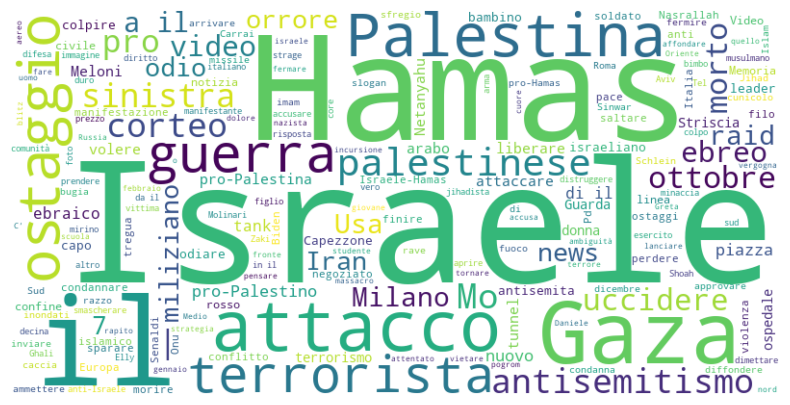

In [105]:
# plot it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
# axes
plt.axis('off')

## All articles bow

In [128]:
all_articles_bow=all_articles["titolo"].apply(lemmatize_and_count)

In [129]:
# turn it into bow
all_articles_bow=pd.DataFrame(all_articles_bow.tolist()).fillna(0)


# bow columns are all columns that are not the original columns
bow_columns=[col for col in all_articles_bow.columns if col not in all_articles.columns]

# order columns by frequency
all_articles_bow=all_articles_bow[all_articles_bow[bow_columns].sum().sort_values(ascending=False).index]

# join with the original dataframe
all_articles_bow=pd.concat([all_articles, all_articles_bow], axis=1)


In [131]:
all_articles_bow.head(10)

,titolo,link,data,giornale,Israele,il,Hamas,,Gaza,Palestina,...,precipitato,conoscere,sconfiggare,conferma,Attaccato,manodopera,brivido,riscoprire,difensore,seggio
0,"Israele, Hamas annuncia: "" Lanciati 150 razzi ...",https://video.repubblica.it/mondo/israele-hama...,2023-10-07,Repubblica,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Israele dopo 50 anni preso di nuovo di sorpres...,https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Israele, i deltaplani d’assalto che hanno aper...",https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Il dolore dei fedeli alla Sinagoga di Roma: ""I...",https://roma.repubblica.it/cronaca/2023/10/07/...,2023-10-07,Repubblica,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Che cos’è Hamas, chi la finanzia, quali sono i...",https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"Israele, miliziani di Hamas uccidono e sequest...",https://video.repubblica.it/mondo/israele-mili...,2023-10-07,Repubblica,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"Israele, la diretta del 7 ottobre: attacco di ...",https://www.repubblica.it/esteri/2023/10/07/di...,2023-10-07,Repubblica,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Migliaia di razzi contro Israele lanciati da G...,https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"Da Berlino a New York, estremisti pro-Hamas fe...",https://www.repubblica.it/esteri/2023/10/08/ne...,2023-10-08,Repubblica,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"Noa, Shani, le sorelline e i lavoratori thaila...",https://www.repubblica.it/esteri/2023/10/08/ne...,2023-10-08,Repubblica,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
# drop link
all_articles_bow=all_articles_bow.drop(columns=["link"])

In [113]:
# save the bow and the sum of the columns
all_articles_bow.to_csv("all_articles_bow.csv", index=False)

In [114]:
# save the wordcount
wordcount_all_articles=all_articles_bow[bow_columns].sum()

wordcount_all_articles.to_csv("wordcount_all_articles.csv")

In [150]:
all_articles_bow

,titolo,data,giornale,Israele,il,Hamas,,Gaza,Palestina,guerra,...,conoscere,sconfiggare,conferma,Attaccato,manodopera,brivido,riscoprire,difensore,seggio,date
0,"Israele, Hamas annuncia: "" Lanciati 150 razzi ...",2023-10-07,Repubblica,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-10-07
1,Israele dopo 50 anni preso di nuovo di sorpres...,2023-10-07,Repubblica,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-10-07
2,"Israele, i deltaplani d’assalto che hanno aper...",2023-10-07,Repubblica,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-10-07
3,"Il dolore dei fedeli alla Sinagoga di Roma: ""I...",2023-10-07,Repubblica,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-10-07
4,"Che cos’è Hamas, chi la finanzia, quali sono i...",2023-10-07,Repubblica,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5706,"Comunità ebraica e sindaco, dialogo dopo la fr...",2024-01-29,Repubblica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-29
5707,Che cosa è successo oggi 22 novembre,2023-11-22,Repubblica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-11-22
5708,"Olanda, urne aperte all’ombra dell’ultradestra...",2023-11-22,Repubblica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2023-11-22
5709,"IA, la ricetta dell’Europa",2023-12-10,Repubblica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-10


<Axes: xlabel='date'>

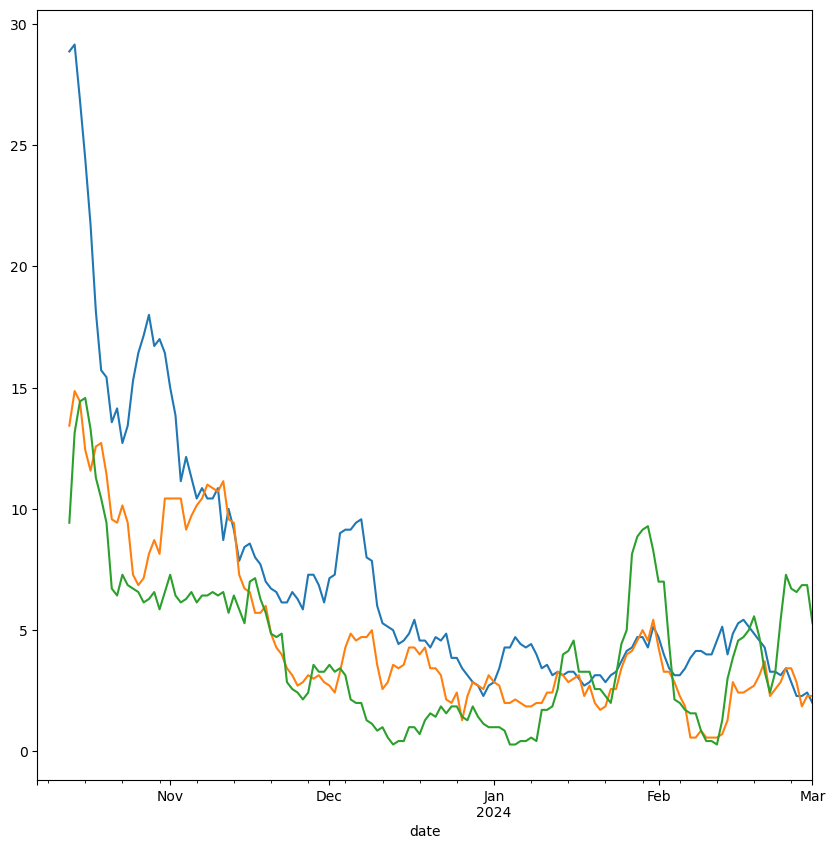

In [155]:
# graph words per day by summing the columns
all_articles_bow["date"] = pd.to_datetime(all_articles_bow["data"])
all_articles_bow_filtered = all_articles_bow

fig, ax = plt.subplots(figsize=(10, 10))

wordcounts_per_day = all_articles_bow_filtered.groupby(all_articles_bow_filtered["date"]).sum()

# Apply smoothing by calculating the rolling mean
smoothed_wordcounts_per_day = wordcounts_per_day.copy()
smoothed_wordcounts_per_day[bow_columns] = wordcounts_per_day[bow_columns].rolling(window=7).mean()

# Plot the smoothed word counts
smoothed_wordcounts_per_day["Hamas"].plot(ax=ax)
smoothed_wordcounts_per_day["Gaza"].plot(ax=ax)
smoothed_wordcounts_per_day["Palestina"].plot(ax=ax)

<Axes: xlabel='date'>

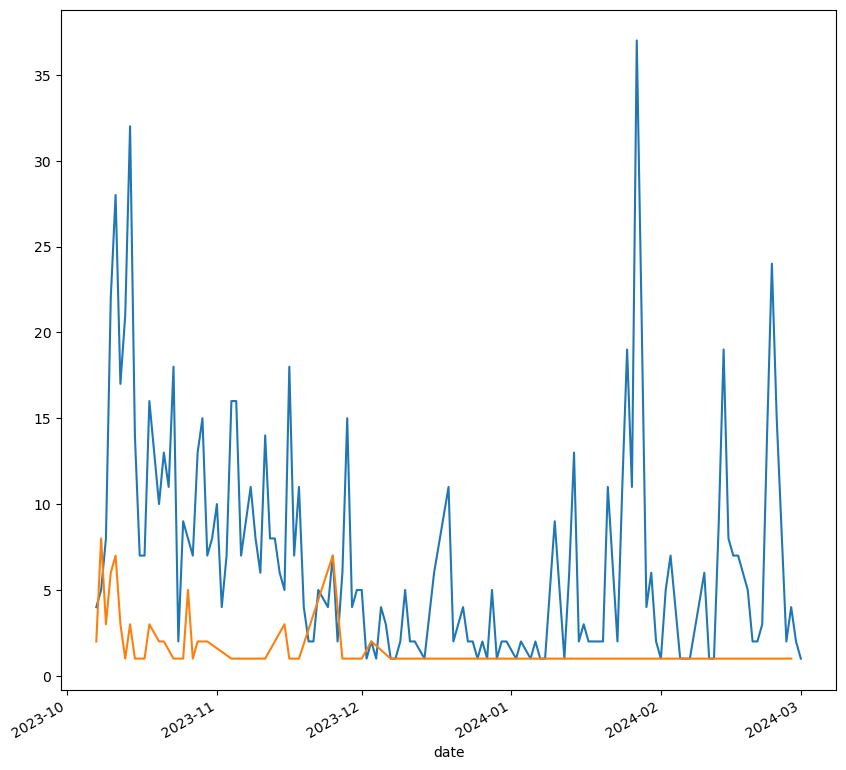

In [182]:
# plot palestines vs terrorista

fig, ax = plt.subplots(figsize=(10, 10))

articoli_palestin_per_day = all_articles_bow_filtered[all_articles_bow_filtered["titolo"].str.contains("palestin", case=False, regex=True)].groupby(all_articles_bow_filtered["date"]).size()
articoli_terrorist_per_day= all_articles_bow_filtered[all_articles_bow_filtered["titolo"].str.contains("terrorist", case=False, regex=True)].groupby(all_articles_bow_filtered["date"]).size()
articoli_palestin_per_day.plot(ax=ax)
articoli_terrorist_per_day.plot(ax=ax)